In [ ]:
def error(f, x, y):
    return np.sum((f(x)-y)**2)

# рефакторинг этой функции: найти в документации
# как вычисляется MSE с помощью scipy

from sklearn.metrics import mean_squared_error
from math import sqrt

Загрузка данных

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt("ex1data2.txt", delimiter=",", skip_header=1, dtype='uint64')

square_house = data[:,0]
number_of_rooms = data[:,1]
cost = data[:,2]

Визуализация данных (отношение числа комнат к стоимости)

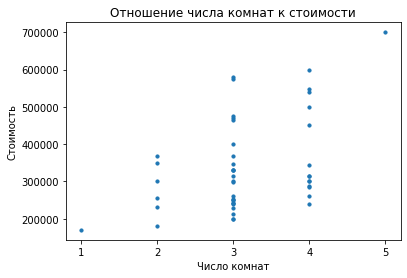

In [ ]:
plt.scatter(number_of_rooms, cost, s=10)
plt.title('Отношение числа комнат к стоимости')
plt.xlabel("Число комнат")
plt.ylabel("Стоимость")
plt.xticks([i for i in range(1, 6)])
plt.show()

Визуализация данных и линейная модель (отношение площади к стоимости)

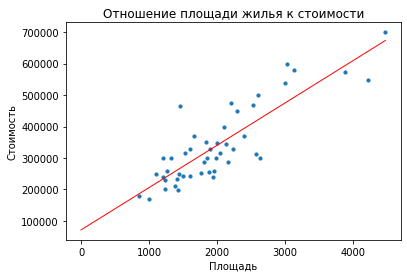

Ошибка данной модели: 1.9346e+11
6.4158e+04


In [ ]:
f1p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 1, full=True)
f1 = np.poly1d(f1p)
fx = np.linspace(0, max(square_house), len(square_house)) 

plt.scatter(square_house, cost, s=10)
plt.plot(fx,f1(fx),linewidth=1.0,color='r')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel("Площадь")
plt.ylabel("Стоимость")
plt.show()

print(f"Ошибка данной модели: {error(f1, square_house, cost):.5}")
print(f"{sqrt(mean_squared_error(list(map(f1, square_house)), cost)):.5}")

Полиномиальные модели (степени 2 и 3), учитывающие только размер жилья

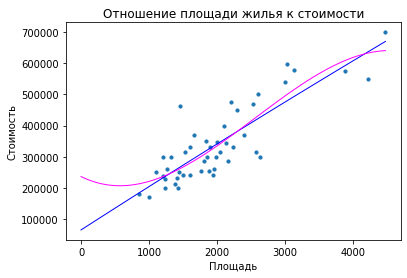

Ошибка модели степени 2: 1.9342e+11
Ошибка модели степени 3: 1.8844e+11


In [ ]:
f2p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 2, full=True)
f2 = np.poly1d(f2p)

f3p, residuals, rank, sv, rcond = np.polyfit(square_house, cost, 3, full=True)
f3 = np.poly1d(f3p)

plt.scatter(square_house, cost, s=10)
plt.plot(fx, f2(fx), linewidth=1.0, color='blue')
plt.plot(fx, f3(fx), linewidth=1.0, color='magenta')
plt.title('Отношение площади жилья к стоимости')
plt.xlabel("Площадь")
plt.ylabel("Стоимость")
plt.show()

print(f"Ошибка модели степени 2: {error(f2, square_house, cost):.5}")
print(f"Ошибка модели степени 3: {error(f3, square_house, cost):.5}")

Линейная модель (с помощью scikit-learn), которая учитывала бы размер жилья и количество комнат

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = pd.DataFrame(zip(square_house, number_of_rooms), columns = ['sq', 'num'])
Y = cost
lin_reg = LinearRegression()
lin_reg.fit(X.values, Y)

test = lin_reg.predict(X.values)
print(f"Ошибка данной модели: {error(lin_reg.predict, X.values, Y):.5}")

Ошибка данной модели: 1.9207e+11


Предскажите значения для двух объектах недвижимости с использованием этих трех моделей: 1650,3; 2200,4

In [ ]:
# линейная модель, учитывающая размер и кол-во
test = pd.DataFrame(zip([1650, 2200], [3, 4]))
pred = lin_reg.predict(test.values)
print(f"Результаты по лин. модели с учётом размера и кол-ва комнат: {[f'{x:.2f}' for x in pred]}")

# лин модель по площади жилья
pred1 = f1(test.values)
print(f"Результаты по лин. модели с учётом размера: {[f'{x:.2f}' for x in pred1[:,0]]}")

# пол модель 2 степени
pred2 = f2(test.values)
print(f"Результаты по пол. модели 2 степени с учётом размера: {[f'{x:.2f}' for x in pred2[:,0]]}")

# пол модель 3 степени
pred3 = f3(test.values)
print(f"Результаты по пол. модели 3 степени с учётом размера: {[f'{x:.2f}' for x in pred3[:,0]]}")

Результаты по лин. модели с учётом размера и кол-ва комнат: ['293081.46', '360909.32']
Результаты по лин. модели с учётом размера: ['293237.22', '367226.13']
Результаты по пол. модели 2 степени с учётом размера: ['293387.08', '368112.59']
Результаты по пол. модели 3 степени с учётом размера: ['285422.83', '365824.75']
